In [94]:
import os
import numpy as np
import pandas as pd
import yahoo_fin.stock_info as si
from datetime import datetime, timedelta
from MCPortfolioSimulator_LR import PortfolioSimulator

# List of assets to fetch data for
asset_list = ["ABBV", "AMZN", "COST", "CVX", "HD", "JNJ", "LLY", "MRK", "PG", "UNH", "V", "^TNX", "^TYX", "WELL", "O", "CCI"]

# Define the start and end dates for fetching the data (2 years)
end_date = datetime.now()
start_date = end_date - timedelta(days=2*365)

# Prepare an empty DataFrame to concatenate all asset DataFrames
all_assets_df = pd.DataFrame()

# Fetch and concatenate data for each asset
for asset in asset_list:
    print(f"Fetching data for {asset}...")
    df = si.get_data(asset, start_date=start_date, end_date=end_date, index_as_date=True)
    
    # Standardize column names
    df.rename(columns={
        'open': 'open', 'high': 'high', 'low': 'low', 'close': 'close',
        'adjclose': 'adj close', 'volume': 'volume'
    }, inplace=True)
    
    # Adjust DataFrame column names for multi-level indexing
    if all_assets_df.empty:
        all_assets_df = df
        all_assets_df.columns = pd.MultiIndex.from_product([[asset], all_assets_df.columns])
    else:
        df.columns = pd.MultiIndex.from_product([[asset], df.columns])
        all_assets_df = pd.concat([all_assets_df, df], axis=1)

# Drop any rows with missing data to ensure consistency
all_assets_df.dropna(inplace=True)

# Display the first few rows of the consolidated data
display(all_assets_df)

# Calculate historical annual returns
historical_returns = {}
for asset in asset_list:
    close_prices = all_assets_df[asset]['close']
    daily_returns = close_prices.pct_change().dropna()
    avg_daily_return = daily_returns.mean()
    annual_return = ((1 + avg_daily_return) ** 252 - 1) * 100  # Convert to percentage
    historical_returns[asset] = annual_return

print("Historical Annual Returns:", historical_returns)

Fetching data for ABBV...
Fetching data for AMZN...
Fetching data for COST...
Fetching data for CVX...
Fetching data for HD...
Fetching data for JNJ...
Fetching data for LLY...
Fetching data for MRK...
Fetching data for PG...
Fetching data for UNH...
Fetching data for V...
Fetching data for ^TNX...
Fetching data for ^TYX...
Fetching data for WELL...
Fetching data for O...
Fetching data for CCI...


ABBV                                                  \
                  open        high         low       close   adj close   
2022-05-26  151.630005  153.070007  150.389999  150.570007  139.293854   
2022-05-27  149.520004  150.050003  147.750000  150.000000  138.766541   
2022-05-31  148.639999  148.880005  146.669998  147.369995  136.333466   
2022-06-01  147.789993  147.889999  144.320007  146.020004  135.084595   
2022-06-02  146.649994  147.070007  142.899994  146.750000  135.759933   
...                ...         ...         ...         ...         ...   
2024-05-20  166.009995  166.419998  164.410004  164.559998  164.559998   
2024-05-21  165.369995  165.710007  162.500000  162.929993  162.929993   
2024-05-22  161.570007  161.940002  159.179993  159.610001  159.610001   
2024-05-23  159.029999  160.039993  157.759995  158.259995  158.259995   
2024-05-24  158.360001  158.779999  156.360001  157.059998  157.059998   

                                     AMZN                          ...  \
                volume ticker        open        high         low  ...   
2022-05-26   6659300.0   ABBV  107.970001  112.665497  107.453499  ...   
2022-05-27   8405000.0   ABBV  113.550003  115.186996  112.627998  ...   
2022-05-31  11227800.0   ABBV  116.279999  121.994499  115.675003  ...   
2022-06-01   5597900.0   ABBV  122.255997  125.179001  120.622498  ...   
2022-06-02   5998900.0   ABBV  121.683998  125.610001  120.044998  ...   
...                ...    ...         ...         ...         ...  ...   
2024-05-20   3058700.0   ABBV  184.339996  186.669998  183.279999  ...   
2024-05-21   3645200.0   ABBV  182.300003  183.259995  180.750000  ...   
2024-05-22   6904900.0   ABBV  183.880005  185.220001  181.970001  ...   
2024-05-23   5672900.0   ABBV  183.660004  184.759995  180.080002  ...   
2024-05-24   3689900.0   ABBV  181.649994  182.440002  180.300003  ...   

                    O                           CCI                          \
            adj close     volume ticker        open        high         low   
2022-05-26  61.440395  4491900.0      O  191.000000  191.809998  186.410004   
2022-05-27  62.595734  3369600.0      O  188.639999  193.949997  187.270004   
2022-05-31  61.795872  6709300.0      O  190.389999  191.589996  188.089996   
2022-06-01  61.669067  2879800.0      O  190.059998  190.059998  186.660004   
2022-06-02  61.995174  2701500.0      O  184.309998  187.259995  176.119995   
...               ...        ...    ...         ...         ...         ...   
2024-05-20  54.980000  3913100.0      O  102.300003  102.599998  100.440002   
2024-05-21  55.080002  3783200.0      O  100.470001  100.930000   99.919998   
2024-05-22  53.720001  5760100.0      O  100.449997  100.629997   99.730003   
2024-05-23  52.310001  5576000.0      O   99.779999  100.139999   98.510002   
2024-05-24  52.180000  4656100.0      O   99.330002   99.349998   97.410004   

                                                      
                 close   adj close     volume ticker  
2022-05-26  187.529999  169.995346  1106600.0    CCI  
2022-05-27  193.389999  175.307449  1326000.0    CCI  
2022-05-31  189.649994  171.917130  2354900.0    CCI  
2022-06-01  188.089996  170.503006  1056000.0    CCI  
2022-06-02  187.210007  169.705292  2695500.0    CCI  
...                ...         ...        ...    ...  
2024-05-20  100.620003  100.620003  2814800.0    CCI  
2024-05-21  100.750000  100.750000  1787400.0    CCI  
2024-05-22  100.220001  100.220001  1974600.0    CCI  
2024-05-23   99.010002   99.010002  1997700.0    CCI  
2024-05-24   98.120003   98.120003  2094800.0    CCI  

[502 rows x 112 columns]

Historical Annual Returns: {'ABBV': 4.330104906048549, 'AMZN': 36.64253051004385, 'COST': 35.554046185195155, 'CVX': -2.3268809387930522, 'HD': 6.631220119715131, 'JNJ': -8.361949519004884, 'LLY': 67.3474893546022, 'MRK': 20.699351701005565, 'PG': 7.754517645108927, 'UNH': 3.1842803586828783, 'V': 16.935401441096044, '^TNX': 34.16639712623879, '^TYX': 27.85061351221787, 'WELL': 10.340799900104813, 'O': -10.690034158163254, 'CCI': -24.861393805809083}


ABBV                                                  \
                  open        high         low       close   adj close   
2022-05-26  151.630005  153.070007  150.389999  150.570007  139.293854   
2022-05-27  149.520004  150.050003  147.750000  150.000000  138.766541   
2022-05-31  148.639999  148.880005  146.669998  147.369995  136.333466   
2022-06-01  147.789993  147.889999  144.320007  146.020004  135.084595   
2022-06-02  146.649994  147.070007  142.899994  146.750000  135.759933   
...                ...         ...         ...         ...         ...   
2024-05-20  166.009995  166.419998  164.410004  164.559998  164.559998   
2024-05-21  165.369995  165.710007  162.500000  162.929993  162.929993   
2024-05-22  161.570007  161.940002  159.179993  159.610001  159.610001   
2024-05-23  159.029999  160.039993  157.759995  158.259995  158.259995   
2024-05-24  158.360001  158.779999  156.360001  157.059998  157.059998   

                                                AMZN              ...      O  \
                volume ticker log_return        open        high  ... ticker   
2022-05-26   6659300.0   ABBV        NaN  107.970001  112.665497  ...      O   
2022-05-27   8405000.0   ABBV  -0.003793  113.550003  115.186996  ...      O   
2022-05-31  11227800.0   ABBV  -0.017689  116.279999  121.994499  ...      O   
2022-06-01   5597900.0   ABBV  -0.009203  122.255997  125.179001  ...      O   
2022-06-02   5998900.0   ABBV   0.004987  121.683998  125.610001  ...      O   
...                ...    ...        ...         ...         ...  ...    ...   
2024-05-20   3058700.0   ABBV  -0.011239  184.339996  186.669998  ...      O   
2024-05-21   3645200.0   ABBV  -0.009955  182.300003  183.259995  ...      O   
2024-05-22   6904900.0   ABBV  -0.020587  183.880005  185.220001  ...      O   
2024-05-23   5672900.0   ABBV  -0.008494  183.660004  184.759995  ...      O   
2024-05-24   3689900.0   ABBV  -0.007611  181.649994  182.440002  ...      O   

                              CCI                                      \
           log_return        open        high         low       close   
2022-05-26        NaN  191.000000  191.809998  186.410004  187.529999   
2022-05-27   0.018630  188.639999  193.949997  187.270004  193.389999   
2022-05-31  -0.016428  190.389999  191.589996  188.089996  189.649994   
2022-06-01  -0.002054  190.059998  190.059998  186.660004  188.089996   
2022-06-02   0.005274  184.309998  187.259995  176.119995  187.210007   
...               ...         ...         ...         ...         ...   
2024-05-20  -0.002725  102.300003  102.599998  100.440002  100.620003   
2024-05-21   0.001817  100.470001  100.930000   99.919998  100.750000   
2024-05-22  -0.025001  100.449997  100.629997   99.730003  100.220001   
2024-05-23  -0.026598   99.779999  100.139999   98.510002   99.010002   
2024-05-24  -0.002488   99.330002   99.349998   97.410004   98.120003   

                                                     
             adj close     volume ticker log_return  
2022-05-26  169.995346  1106600.0    CCI        NaN  
2022-05-27  175.307449  1326000.0    CCI   0.030770  
2022-05-31  171.917130  2354900.0    CCI  -0.019529  
2022-06-01  170.503006  1056000.0    CCI  -0.008260  
2022-06-02  169.705292  2695500.0    CCI  -0.004690  
...                ...        ...    ...        ...  
2024-05-20  100.620003  2814800.0    CCI  -0.022309  
2024-05-21  100.750000  1787400.0    CCI   0.001291  
2024-05-22  100.220001  1974600.0    CCI  -0.005274  
2024-05-23   99.010002  1997700.0    CCI  -0.012147  
2024-05-24   98.120003  2094800.0    CCI  -0.009030  

[502 rows x 128 columns]

array([4.54320343e-04, 1.01601823e-03, 7.42302822e-04, 9.83736857e-05,
       5.92729491e-04, 1.57163709e-04, 9.98161214e-04, 3.53607838e-04,
       2.75526884e-04, 7.37362881e-04, 6.46364535e-04, 2.17350142e-04,
       1.23456329e-04, 1.58307792e-04, 1.03016276e-04, 9.21751036e-05])

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:94: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


count           500.000000
mean             17.416960
std               6.985971
min               6.018192
25%              12.602569
50%              16.264647
75%              20.696970
max              53.832293
95% CI Lower      7.699296
95% CI Upper     34.824148
Name: 7560, dtype: float64


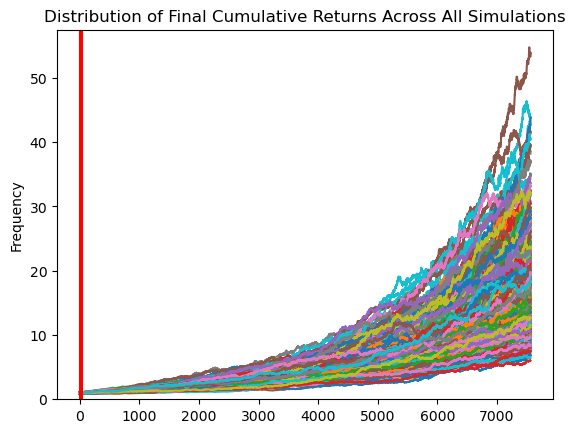

In [95]:
# Define weights and historical returns
weights = [0.03, 0.02, 0.02, 0.04, 0.04, 0.17, 0.03, 0.05, 0.17, 0.02, 0.05, 0.04, 0.17, 0.01, 0.13, 0.01]

historical_returns = {
    "ABBV": 12.13, "AMZN": 29.18, "COST": 20.57, "CVX": 2.51, "HD": 16.11,
    "JNJ": 4.04, "LLY": 28.60, "MRK": 9.32, "PG": 7.19, "UNH": 20.42,
    "V": 17.69, "^TNX": 5.63, "^TYX": 3.16, "WELL": 4.07, "O": 2.63, "CCI": 2.35
}

# Initialize the PortfolioSimulator
sim_returns2 = PortfolioSimulator(
    portfolio_data=all_assets_df,
    annual_returns=historical_returns,
    weights=weights,
    num_simulation=500,
    num_trading_days=252*30  # Simulate for 2 years (approx. 252 trading days per year)
)

# Display the first few rows of the portfolio data
display(sim_returns2.portfolio_data)
display(sim_returns2.daily_log_returns)

# Run the simulation
cumulative_returns = sim_returns2.calc_cumulative_return()

# Plot the simulation results
sim_returns2.plot_simulation()

# Plot the distribution of final cumulative returns
sim_returns2.plot_distribution()

# Summarize the cumulative return statistics
summary = sim_returns2.summarize_cumulative_return()
print(summary)

In [98]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
port_high_return = round(initial_investment * summary[9],2) 
port_low_return = round(initial_investment * summary[8],2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${port_low_return} and ${port_high_return}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $153985.92 and $696482.96


In [97]:
initial_investment = 20000
lower_estimate = 148845.95
upper_estimate = 624488.31

years = 30

lower_annual_return = (lower_estimate / initial_investment) ** (1 / years) - 1
upper_annual_return = (upper_estimate / initial_investment) ** (1 / years) - 1

print(f"Lower Implied Annual Return: {lower_annual_return * 100:.2f}%")
print(f"Upper Implied Annual Return: {upper_annual_return * 100:.2f}%")

Lower Implied Annual Return: 6.92%
Upper Implied Annual Return: 12.15%
